In [1]:
# Simple Linear Regresion 
# In this workbook our object to draw the best fit line using pytorch linearRegressionModel
# We will draw BEST FIT LINE  

import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Dataset for Linear Regression
A very simple and classic one is a dataset relating Years of Experience to Salary

| Years of Experience | Salary |
|---------------------|--------|
| 1                   | 30     |
| 2                   | 40     |
| 3                   | 55     |
| 4                   | 60     |
| 5                   | 75     |
| 6                   | 80     |

We will use linear regression on this data so we can guess the salary if we we know expereince and vice versa. with the help of linear regression we can draw best fit line as you will see in this notebook. 

Line equation in mathematics is like **y = m * x + c** 

In [3]:
#import the above data set for programming
X_numpy =  np.array([1, 2, 3, 4, 5, 6], dtype=np.float32)
y_numpy = np.array([30, 40, 55, 60, 75, 80], dtype=np.float32)

In [4]:
# Step 1 : Prepare the data as per Pytorch requirement
# Convert NumPy arrays to PyTorch tensors Because Pytorch works with only Tensor --> torch.from_numpy(<Your Numpy Array>)
# We also need to reshape X_numpy to be a 2D array (or a column vector) --> using .reshape(-1,1 )
# --> Key Learning
# PyTorch models expect inputs in this shape (batch_size, num_features).
# batch_size is the number of samples, and num_features is 1 (Years of Experience).

X = torch.from_numpy(X_numpy.reshape(-1, 1))
y = torch.from_numpy(y_numpy.reshape(-1, 1))

In [5]:
# 2. Define the Model
# Our linear regression model is very simple: it has one linear layer.
# Input and Output layer WE can programm this
# y = m*x + c  is a linear transformation.

class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, output_dim)

    def forward(self, x):
        out = self.linear(x)
        return out

# Instantiate the model
# input_dim = 1 (we have one feature: Years of Experience)
# output_dim = 1 (we want to predict one value: Salary)

input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

In [6]:
# 3. Define Loss Function and Optimizer
# Loss Function: This measures how bad our model's predictions are compared to the actual values.
# For regression, Mean Squared Error (MSE) is common. It calculates the average of the squared differences
# between predicted and actual values. Squaring ensures errors are positive and penalizes larger errors more.

criterion = nn.MSELoss()

# Optimizer: This is the algorithm that adjusts the model's parameters (m and c) to minimize the loss.
# Stochastic Gradient Descent (SGD) is a popular choice.
# 'model.parameters()' tells the optimizer which values it needs to adjust.
# 'lr' is the learning rate: it controls how big the adjustment steps are.
# A small learning rate means slower but potentially more precise learning.
# A large learning rate might overshoot the optimal values.

learning_rate = 0.01
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [7]:
# 4. Training the Model
# Training involves feeding the data to the model multiple times (epochs)
# and updating the weights (m and c) in each iteration to reduce the loss.
# num_epoch is How many times we go through the entire dataset

num_epochs = 2000  

for epoch in range(num_epochs):

    outputs = model(X)                     # Pass Values to Model and Get output

    loss = criterion(outputs, y)           # Loss Function check the difference between actual and predicted.

    optimizer.zero_grad()                  # Clears old gradients from the previous step.It's important because
                                           # otherwise gradients would accumulate.

    loss.backward()                        # Computes the gradients of the loss with respect to model parameters (m and c).
                                           # This tells us how much each parameter contributed to the error and in which
                                           # direction to adjust it.

    optimizer.step()                       # optimizer.step(): Updates the model parameters (m and c) using the 
                                           # computed gradients and the learning rate. It tries to move the 
                                           # parameters in the direction that reduces the loss.

    if (epoch + 1) % 200 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [200/2000], Loss: 18.7214
Epoch [400/2000], Loss: 8.4227
Epoch [600/2000], Loss: 6.0369
Epoch [800/2000], Loss: 5.4841
Epoch [1000/2000], Loss: 5.3561
Epoch [1200/2000], Loss: 5.3264
Epoch [1400/2000], Loss: 5.3195
Epoch [1600/2000], Loss: 5.3179
Epoch [1800/2000], Loss: 5.3176
Epoch [2000/2000], Loss: 5.3175


In [8]:

# 5. Evaluating the Model and Plotting
# After training, our model has learned (hopefully good) values for 'm' and 'c'.
# Put the model in evaluation mode (this is good practice, though for a simple linear model

model.eval()

LinearRegressionModel(
  (linear): Linear(in_features=1, out_features=1, bias=True)
)

In [9]:
# 6.  Get predictions on the training data (or ideally, on new unseen data)
# We use torch.no_grad() because we are just making predictions, not training,
# so we don't need PyTorch to calculate gradients. This saves memory and computation.
# Note : During training we need to track the gradient 

with torch.no_grad():
    predicted = model(X).detach().numpy()   # .detach() removes it from computation graph, .numpy() converts to NumPy array



PyTorch Learned Parameters:
Slope (m): 10.2884
Y-intercept (c): 20.6551


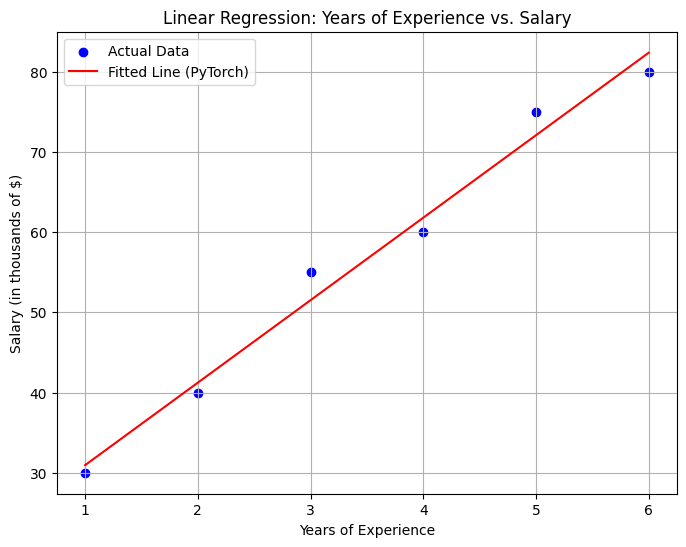

In [10]:
# 7. Inspecting the Learned Parameters
# The linear layer (self.linear) in our model stores the learned 'm' (weight) and 'c' (bias).

learned_m = model.linear.weight.item()
learned_c = model.linear.bias.item()

print(f"\nPyTorch Learned Parameters:")
print(f"Slope (m): {learned_m:.4f}")
print(f"Y-intercept (c): {learned_c:.4f}")


# Optional : Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X_numpy, y_numpy, color='blue', label='Actual Data') 
plt.plot(X_numpy, predicted, color='red', label='Fitted Line (PyTorch)')   
plt.title('Linear Regression: Years of Experience vs. Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary (in thousands of $)')
plt.legend()
plt.grid(True)
plt.show()

# Since we have slope(m) and intercept(c) we can minimum loss prediction with linear structure data. 
# Like we have to calculate the guy with zero experience who much salary he/she can expect. 
# y = m * x + c => 10.2884 * 0 + 20.6551 => 20.6551
# With the above equation we can guess how mush salary fresher can expect 20.667. This is not in true world but this is best example I can find the explain the simple linear regression.


In [11]:
# --- Let's quickly check our manual calculation with this full dataset ---
# n = 6
# sum_x = np.sum(X_numpy)  # 1+2+3+4+5+6 = 21
# sum_y = np.sum(y_numpy)  # 30+40+55+60+75+80 = 340
# sum_xy = np.sum(X_numpy * y_numpy) # 30*1 + 40*2 + 55*3 + 60*4 + 75*5 + 80*6 = 30+80+165+240+375+480 = 1370
# sum_x_sq = np.sum(X_numpy**2) # 1+4+9+16+25+36 = 91

# m_manual = (6 * 1370 - 21 * 340) / (6 * 91 - 21**2)
# m_manual = (8220 - 7140) / (546 - 441)
# m_manual = 1080 / 105
# m_manual = 10.2857

# c_manual = (340 - m_manual * 21) / 6
# c_manual = (340 - 10.2857 * 21) / 6
# c_manual = (340 - 216.0) / 6
# c_manual = 124 / 6
# c_manual = 20.6667
# print(f"Manual calculation with full dataset: m = {m_manual:.4f}, c = {c_manual:.4f}")
# Our PyTorch model should get close to these values.

# Plotting

# m_manual_full = 10.2857
# c_manual_full = 20.6667
# y_manual_line = m_manual_full * X_numpy + c_manual_full
# plt.plot(X_numpy, y_manual_line, color='green', linestyle='--', label=f'Manual Fit (m={m_manual_full:.2f}, c={c_manual_full:.2f})')

# plt.legend()
# plt.grid(True)
# plt.show()